# SENTIMENT MODELING PART 2 (VADER,ROBERTA)

The notebook 4a. Classifies using Native Bayes, In this notebook, we are handling the data and feeding it through two NLP techniques: 
1. Vader Scoring
2. Roberta Pretrained NLP models

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#adding ntlk for NLP training
import nltk

In [3]:
#we look at the data to make sure that all information is there.
df = pd.read_parquet('data/edmonton_cleaned.parquet', engine='auto')
df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,...,"Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",uwPhE21CZLlp1kkSMPvvYw,5OnQqP3q2_9auNdDKpLdsw,3,0,0,0,So much to like about this place--the beautifu...,2012-11-06 23:35:15
1,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,...,"Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",bAy8ROEYO_3aTBhW5LoR4g,7qFH1RkPivVRcwxLwhyixg,4,2,0,1,I'm not a coffee connoisseur so I'm not review...,2013-05-28 23:16:30
2,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,...,"Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",zPDHE7TrXs7EJT06qD8yTA,FLeyjgc05C2V6QI9nVQ48Q,4,0,0,0,"I really loved it here, makes me wish I lived ...",2013-09-04 19:49:33
3,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,...,"Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",84niL3fvJMlFBE2hd2qOVQ,R-c5M0iJkMxxTxIqTQQZ8w,2,1,0,0,The kids who work at Roast are friendly. They...,2013-07-14 21:38:06
4,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,...,"Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",pLnTjS90gUlsq2tAjI9prA,G3h8pIclwUbuu3itJqF7ug,4,7,0,4,"With a Toast to Roast, I say welcome to the E-...",2012-09-11 23:54:24


## 1. VADER model

VADER (Valence Aware Dictionary for sEntiment Reasoning) is a model used for sentiment analysis that is sensitive to both polarity(positive/negative) and intensity (strength) of emotions.

citation:

C. Hutto and E. Gilbert, “VADER: A Parsimonious Rule-Based Model for Sentiment Analysis of Social Media Text”, ICWSM, vol. 8, no. 1, pp. 216-225, May 2014.

this kind of uses a bag of words approach:
1. We remove stop words.
2. We score each tokens(words) and combine the total score.

<b>
<p style="color:maroon"> note with this technique, the relationship between words are removed, taking a very important part of the human speech. </p>
</b>

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()
#the analyzer object. we can run it on text and see analyzer.

In [26]:
examplepos = "I love this bar! Best place ever yum!"

sia.polarity_scores(examplepos)

#compound score give the compounding value of the sentence. 
#range is from -1 to 1. -1 is very negative, 1 is very positive.

{'neg': 0.0, 'neu': 0.358, 'pos': 0.642, 'compound': 0.8745}

In [25]:
exampleneg = "disgusting, I would never eat here again. Gross gross gross yuck."
sia.polarity_scores(exampleneg)

{'neg': 0.679, 'neu': 0.321, 'pos': 0.0, 'compound': -0.9136}

In [32]:
exampledf = df['text'][0]
print(exampledf)
print(sia.polarity_scores(exampledf))

So much to like about this place--the beautiful Mercer Building location, the spaciousness, the lovely, friendly baristas. But there are a couple of important cons for me. Biggest being, the music is constant and too loud, ruining everything you go to a coffee shop to do: read, work, reflect, or enjoy a good conversation. When I asked for it to be turned down, they told me they can't--it just plays at one level all the time, and the speakers  are everywhere so you can't get away from it. It sucks.

Secondly, if you're a tea drinker, you're out of luck. They don't serve the tea in pots, but huge, sloppy individual filters--it makes your beverage totally ungainly, hard to drink and is really off putting.

Pros: gluten free goodies and yummy Italian sodas. I'd love to spend more time here, but the music usually drives me out after 10 minutes.
{'neg': 0.055, 'neu': 0.717, 'pos': 0.228, 'compound': 0.9862}


In [34]:
exampledf = df['text'][21]
print(exampledf)
print(sia.polarity_scores(exampledf))

As several other reviewers have observed, this place looks very good. One wants to like it. The management, however, is so clueless that I have decided to permanently give it a pass. There are so many really good places in this area where the management knows how to retain good people that one need not spend time in a place where the servers seem to change on a daily basis.

When I buy high-priced coffee, I like to have it in a real mug, not a cardboard cup that I could get at any fast-food joint. When the people here mistakenly put mine in a cardboard cup, I did not ask for a new coffee. Instead, I politely pointed it out in the hopes that they would get it right the next time. In return, I got an argument and nasty looks from the crew at the counter. Also, no matter now many people they have at the counter, they manage to keep even small groups of customers waiting on long lines.

Yesterday was the kicker. I asked for a decaf coffee and told there was no decaf. Even your average dine

In [73]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3)
#we keep 30% for testing

In [74]:
res= {}
for i,row in tqdm(df.iterrows(),total=len(train)):
    text = row['text']
    Bid = row['business_id']
    res[Bid] = sia.polarity_scores(text)
# 1 minute on 16 seconds rendering on my desktop computer.

  0%|          | 0/47003 [00:00<?, ?it/s]

In [75]:
dfscorevaders = pd.DataFrame(res).T.reset_index().rename(columns={'index': 'business_id'})

In [77]:
dfscorevaders = dfscorevaders.merge(train,how = 'left')


In [100]:
dfscorevaders

,business_id,neg,neu,pos,compound,name,address,city,state,postal_code,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,WKMJwqnfZKsAae75RMP6jA,0.026,0.679,0.295,0.9977,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,...,"Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",r-ZglJVC72csY_R6jlg7PA,3k7GJ9_zqE14Z3IZ9M4iSA,4.0,1.0,0.0,0.0,"I love Roast, it's my place to escape during a...",2013-11-19 22:46:07
1,WKMJwqnfZKsAae75RMP6jA,0.026,0.679,0.295,0.9977,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,...,"Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",TMrWl15OY-E-nMur24EJbw,aJ-rC2_WISqSozSEvv2DbQ,2.0,1.0,0.0,0.0,I had trouble placing the stars on this one be...,2012-10-30 23:38:12
2,WKMJwqnfZKsAae75RMP6jA,0.026,0.679,0.295,0.9977,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,...,"Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",5iTI0jGv3wFjK0nWqp8Fxg,X5VL_N2qt1NDxYpcB_EmBg,5.0,0.0,0.0,0.0,Hope everybody had a nice Valentine's Day yest...,2013-02-22 18:30:37
3,WKMJwqnfZKsAae75RMP6jA,0.026,0.679,0.295,0.9977,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,...,"Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",A0ABEjPmHdnppMTYrEQKHQ,xP3hB3UoOFrbo6yx0LdNKA,4.0,1.0,0.0,1.0,"I'm not a coffee coneiseuer to say the least, ...",2012-10-04 01:02:33
4,WKMJwqnfZKsAae75RMP6jA,0.026,0.679,0.295,0.9977,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,...,"Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",AfpWOz_x2zLjyIg21HeR0g,Q5jOFJYhIsN8ouJ1rnsLQQ,4.0,4.0,2.0,4.0,Admittedly as I am not much of a coffee connoi...,2012-08-29 05:15:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46999,hn9Toz3s-Ei3uZPt7esExA,0.060,0.707,0.233,0.9092,West Side Kebab House,2470 Guardian Road NW,Edmonton,AB,T5T 1K8,...,"Middle Eastern, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",cdwE0S1ONp1ypsTN1e3mLg,C6jwPqUk8VB0FuZO7y2MHA,5.0,1.0,1.0,1.0,Excellent Mediterranean food! Always cooked to...,2018-06-19 02:02:41
47000,hn9Toz3s-Ei3uZPt7esExA,0.060,0.707,0.233,0.9092,West Side Kebab House,2470 Guardian Road NW,Edmonton,AB,T5T 1K8,...,"Middle Eastern, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",vvD4bVhdT2Gxs1jhTpeR1w,irbnyl1EVXD95S5ATNThGg,5.0,1.0,0.0,1.0,We ordered take out for 12. Beef and chicken k...,2018-07-25 04:17:01
47001,hn9Toz3s-Ei3uZPt7esExA,0.060,0.707,0.233,0.9092,West Side Kebab House,2470 Guardian Road NW,Edmonton,AB,T5T 1K8,...,"Middle Eastern, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",29V8Q_XmU9e2_YC9vY6Y7A,1ThYcif-sWXQInvc_sH2dw,4.0,2.0,0.0,0.0,I was excited to see a Kebab house open in wes...,2017-01-08 05:18:14
47002,hn9Toz3s-Ei3uZPt7esExA,0.060,0.707,0.233,0.9092,West Side Kebab House,2470 Guardian Road NW,Edmonton,AB,T5T 1K8,...,"Middle Eastern, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",AmelL81glKWKsnL3PshRFQ,bJdydVeS9ZP9eUqPEI8KZg,5.0,0.0,0.0,0.0,"We ordered fried eggplant, hummus, and grilled...",2018-02-27 03:42:57


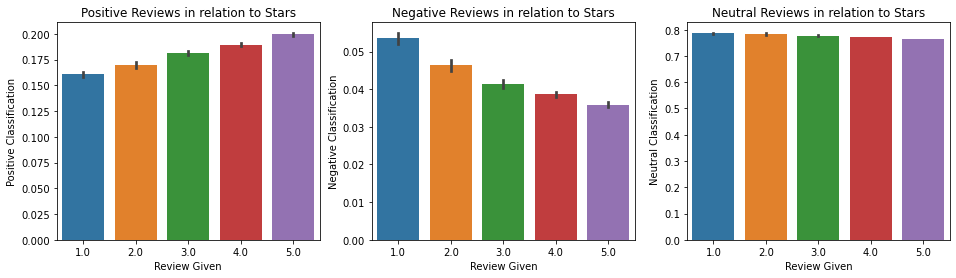

In [121]:
#It's plotting time. seaborn style.

fig , axes = plt.subplots(1,3,figsize = (16,4))
sns.barplot(data=dfscorevaders, x='stars_y', y= 'pos', ax=axes[0])
sns.barplot(data=dfscorevaders, x='stars_y', y= 'neg', ax=axes[1])
sns.barplot(data=dfscorevaders, x='stars_y', y= 'neu', ax=axes[2])

axes[0].set(xlabel='Review Given', ylabel='Positive Classification' )
axes[1].set(xlabel='Review Given', ylabel='Negative Classification')
axes[2].set(xlabel='Review Given', ylabel='Neutral Classification')


axes[0].set_title('Positive Reviews in relation to Stars')
axes[1].set_title('Negative Reviews in relation to Stars')
axes[2].set_title('Neutral Reviews in relation to Stars')
plt.show()

<b><p style="color:maroon">Based on the plots above, looks like negative reviews does make a difference in relation to stars.
    though the positive side, the vader scoring is not as strong of a model with the data on hand</p></b>

## 2. Roberta NLP models